<h2> <center>Demand Estimation</h2></center>
The model used here is SARIMAX becuase there is trend in data becuase there is trend and seasonality in the data post applying transformation. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf_ols
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import itertools
import sys
import warnings

In [3]:
df=pd.read_csv('Electricity Consumption.csv')
df

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107
...,...,...
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765


In [4]:
df.DATE=pd.to_datetime?

In [5]:
df['New_Date']=pd.to_datetime(df.DATE)

In [6]:
df

,DATE,Electricty_Consumption_in_TW,New_Date
0,1/1/1973,35.9728,1973-01-01
1,2/1/1973,36.1334,1973-02-01
2,3/1/1973,35.0625,1973-03-01
3,4/1/1973,33.8416,1973-04-01
4,5/1/1973,33.5107,1973-05-01
...,...,...,...
556,5/1/2019,97.5860,2019-05-01
557,6/1/2019,110.8580,2019-06-01
558,7/1/2019,122.1014,2019-07-01
559,8/1/2019,121.7765,2019-08-01


In [7]:
df['DATE']=df.New_Date

In [8]:
df=df.set_index('New_Date')

In [9]:
df.Electricty_Consumption_in_TW.isna().sum()

0

<AxesSubplot:xlabel='New_Date'>

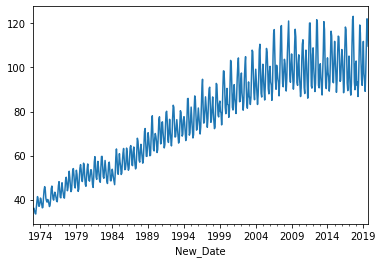

In [10]:
df.Electricty_Consumption_in_TW.plot()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.1 KB


In [12]:
df['Month']=df.DATE.dt.month
df['Year']=df.DATE.dt.year

In [13]:
pd.pivot_table(data=df,index='Year',columns='Month',values='Electricty_Consumption_in_TW')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1973,35.9728,36.1334,35.0625,33.8416,33.5107,36.4823,39.1412,41.4137,40.1639,37.1133,37.0248,38.4341
1974,40.7455,39.8340,37.9408,36.3004,36.5293,40.8899,44.3563,45.9240,44.4555,40.6417,39.4901,38.9068
1975,40.0956,39.6944,38.3040,36.8939,37.5668,40.3832,44.9671,46.1853,43.3001,40.3836,39.8092,42.0597
1976,43.4099,42.5826,40.9244,39.3533,39.0766,42.4851,46.3693,48.1945,45.1688,41.1880,40.8431,44.1468
1977,47.6892,44.8505,42.8557,41.0177,40.7201,45.0610,48.9685,50.1898,47.5982,44.0684,45.4267,49.3447
1978,52.9153,49.9488,46.1749,43.6652,44.5402,48.9480,53.8292,54.1182,50.9980,46.3711,45.3267,49.0027
1979,53.3617,51.6279,47.8264,43.7935,44.8591,50.3292,54.3579,55.9197,53.5776,48.7261,48.2585,51.3008
1980,56.5838,55.6802,50.4428,46.8693,46.0886,49.7595,53.8273,56.2272,52.5737,48.8947,48.4081,50.6659
1981,53.5867,53.5461,51.0708,46.9172,45.5795,50.0235,57.1384,59.5376,56.1935,50.3249,49.2234,52.8176


<AxesSubplot:xlabel='Year'>

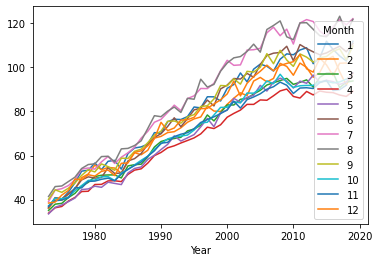

In [14]:
pd.pivot_table(data=df,index='Year',columns='Month',values='Electricty_Consumption_in_TW').plot()

<AxesSubplot:xlabel='Month'>

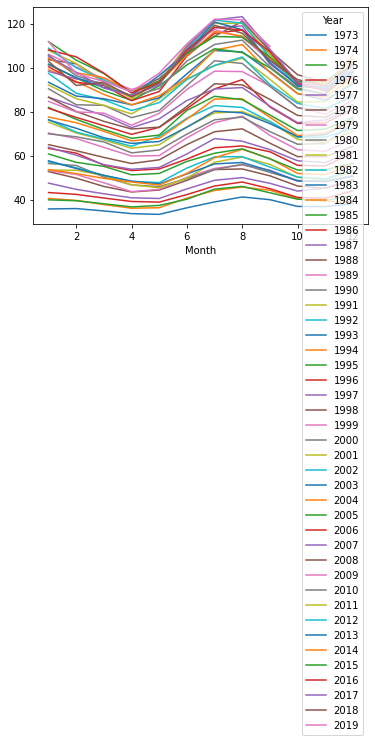

In [15]:
pd.pivot_table(data=df,index='Month',columns='Year',values='Electricty_Consumption_in_TW').plot()

In [16]:
seasonal_decompose?

In [17]:
SD=seasonal_decompose(df.Electricty_Consumption_in_TW,model='multiplicative')

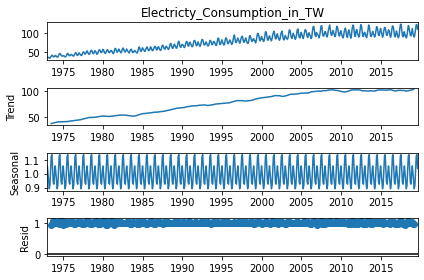

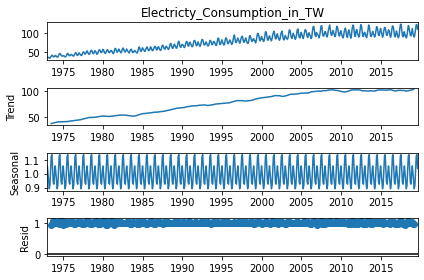

In [18]:
SD.plot()

In [19]:
SD.seasonal

New_Date
1973-01-01    1.055358
1973-02-01    0.996086
1973-03-01    0.945337
1973-04-01    0.890877
1973-05-01    0.918780
                ...   
2019-05-01    0.918780
2019-06-01    1.030843
2019-07-01    1.125749
2019-08-01    1.136105
2019-09-01    1.038776
Name: seasonal, Length: 561, dtype: float64

In [20]:
Decompostion=pd.concat([SD.observed,SD.trend,SD.seasonal,SD.resid],axis=1)

In [21]:
pd.DataFrame?

In [22]:
Decompostion.head(20)

,Electricty_Consumption_in_TW,trend,seasonal,resid
New_Date,,,,
1973-01-01,35.9728,NaN,1.055358,NaN
1973-02-01,36.1334,NaN,0.996086,NaN
1973-03-01,35.0625,NaN,0.945337,NaN
1973-04-01,33.8416,NaN,0.890877,NaN
1973-05-01,33.5107,NaN,0.918780,NaN
1973-06-01,36.4823,NaN,1.030843,NaN
1973-07-01,39.1412,37.223388,1.125749,0.934064
1973-08-01,41.4137,37.576442,1.136105,0.970085
1973-09-01,40.1639,37.850562,1.038776,1.021507


In [23]:
Decompostion.columns

Index(['Electricty_Consumption_in_TW', 'trend', 'seasonal', 'resid'], dtype='object')

In [24]:
Decompostion.columns=['Observed','Trend','Seasonal','Irregularity']

In [25]:
Decompostion.head(20)

,Observed,Trend,Seasonal,Irregularity
New_Date,,,,
1973-01-01,35.9728,NaN,1.055358,NaN
1973-02-01,36.1334,NaN,0.996086,NaN
1973-03-01,35.0625,NaN,0.945337,NaN
1973-04-01,33.8416,NaN,0.890877,NaN
1973-05-01,33.5107,NaN,0.918780,NaN
1973-06-01,36.4823,NaN,1.030843,NaN
1973-07-01,39.1412,37.223388,1.125749,0.934064
1973-08-01,41.4137,37.576442,1.136105,0.970085
1973-09-01,40.1639,37.850562,1.038776,1.021507


In [26]:
acf(df.Electricty_Consumption_in_TW)

C:\Users\VVLG\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\VVLG\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.95647392, 0.87822982, 0.82945315, 0.841529  ,
       0.88813059, 0.91122643, 0.88196658, 0.82805401, 0.80579718,
       0.84356484, 0.9092393 , 0.94048579, 0.90057994, 0.82617458,
       0.77958655, 0.79320802, 0.8397309 , 0.86221357, 0.83379379,
       0.78177625, 0.76069374, 0.79757444, 0.8619873 , 0.89139636,
       0.85166914, 0.77857553, 0.73313065, 0.74640927, 0.79162819,
       0.81316289, 0.78520664, 0.73310236, 0.71201771, 0.74767556,
       0.80929857, 0.83784094, 0.79920595, 0.72847833, 0.6849164 ,
       0.69784608])

In [27]:
pacf_ols(df.Electricty_Consumption_in_TW)

C:\Users\VVLG\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:886: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


array([ 1.        ,  0.96010214, -0.46239143,  0.68714216,  0.45886201,
        0.1559856 , -0.18798794, -0.01014574,  0.18169407,  0.49156644,
        0.49933306,  0.5094987 ,  0.37656677, -0.41925301, -0.05163282,
       -0.13345659,  0.11005347, -0.00342721, -0.02550308,  0.01845861,
       -0.0503431 , -0.00971101,  0.057987  ,  0.2401917 ,  0.1500228 ,
       -0.12035626, -0.01871735, -0.05644169, -0.00463219, -0.06631367,
        0.0409564 ,  0.02993122, -0.04493081,  0.10883131,  0.00458799,
        0.13946451,  0.10968151, -0.18123046, -0.01554567, -0.0029174 ,
       -0.07123474])

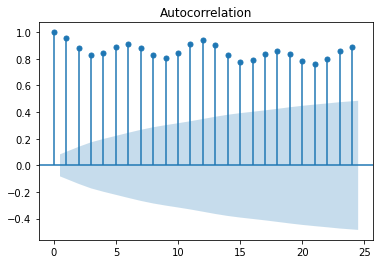

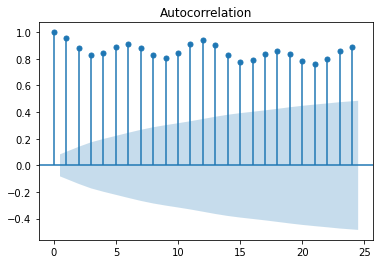

In [28]:
smt.graphics.plot_acf(df.Electricty_Consumption_in_TW,lags=24)

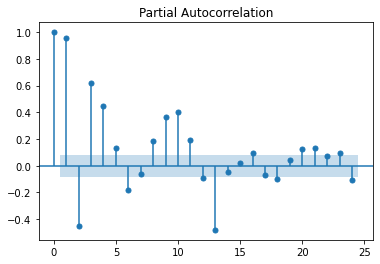

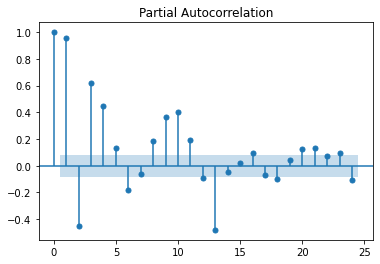

In [29]:
smt.graphics.plot_pacf(df.Electricty_Consumption_in_TW,lags=24)

In [30]:
print('P Value:',adfuller(df.Electricty_Consumption_in_TW)[1])

P Value: 0.410328160446865


In [31]:
print('Since P Value of 0.410 is greater than 0.05 we can consider that the data is not stationary')

Since P Value of 0.410 is greater than 0.05 we can consider that the data is not stationary


<h4><center>Applying Log transformation

In [32]:
print('P Value:',adfuller(np.log(df.Electricty_Consumption_in_TW))[1])

P Value: 0.03472044330065557


In [33]:
print('Now, since P Value of 0.034 is lesser than 0.05 we can consider that the data is stationary')

Now, since P Value of 0.034 is lesser than 0.05 we can consider that the data is stationary


<h3><center>Finding the best averages

<AxesSubplot:xlabel='New_Date'>

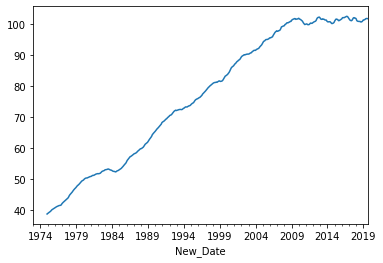

In [34]:
df.Electricty_Consumption_in_TW.rolling(window=24).mean().plot()

In [35]:
df.Year.unique()

array([1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019], dtype=int64)

<h4>Running ETS model

In [36]:
ets = ExponentialSmoothing(df.Electricty_Consumption_in_TW, trend = 'mul', seasonal='mul', seasonal_periods=24)

C:\Users\VVLG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\VVLG\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [37]:
ets = ets.fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)

C:\Users\VVLG\AppData\Local\Temp/ipykernel_37676/3731238520.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets = ets.fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)
C:\Users\VVLG\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [38]:
ets.summary()

Dep. Variable:,Electricty_Consumption_in_TW,No. Observations:,561
Model:,ExponentialSmoothing,SSE,1701473.464
Optimized:,True,AIC,4553.696
Trend:,Multiplicative,BIC,4674.929
Seasonal:,Multiplicative,AICC,4557.206
Seasonal Periods:,24,Date:,"Wed, 29 Sep 2021"
Box-Cox:,False,Time:,00:59:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1000000,alpha,False
smoothing_trend,0.6000000,beta,False


In [39]:
ets.forecast(steps=12)

C:\Users\VVLG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2019-10-01    33.636621
2019-11-01    27.273805
2019-12-01    25.713275
2020-01-01    23.855087
2020-02-01    20.612762
2020-03-01    19.000178
2020-04-01    17.509947
2020-05-01    18.406531
2020-06-01    21.335154
2020-07-01    24.183641
2020-08-01    25.435550
2020-09-01    23.866435
Freq: MS, dtype: float64

In [40]:
df.tail(5)

,DATE,Electricty_Consumption_in_TW,Month,Year
New_Date,,,,
2019-05-01,2019-05-01,97.5860,5,2019
2019-06-01,2019-06-01,110.8580,6,2019
2019-07-01,2019-07-01,122.1014,7,2019
2019-08-01,2019-08-01,121.7765,8,2019
2019-09-01,2019-09-01,109.7190,9,2019


<h4>Train Test Split Data

In [41]:
train=df.Electricty_Consumption_in_TW[:'2005-12-01']
test=df.Electricty_Consumption_in_TW['2006-01-01':]

In [42]:
print(train.shape)
print(test.shape)

(396,)
(165,)


<h3><center>Iterate for best ETS model

In [199]:
Alpha_list=[]
Beta_list=[]
Gamma_list=[]
Error_list=[]

for a in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    for b in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
        for g in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
            
            ets = ExponentialSmoothing(train, trend = 'mul', seasonal='mul', seasonal_periods=24)
            ets = ets.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
            Forecasted_train=ets.forecast(steps=165)
            
            Alpha_list.append(a)
            Beta_list.append(b)
            Gamma_list.append(g)
            Error_list.append(np.mean(np.abs(test-Forecasted_train)/test))

C:\Users\VVLG\AppData\Local\Temp/ipykernel_3724/1509386879.py:11: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets = ets.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\VVLG\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\VVLG\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1383: RuntimeWarning: overflow encountered in multiply
  trend = trended(lvls, b)
C:\Users\VVLG\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1382: RuntimeWarning: overflow encountered in power
  b[nobs:] = dampen(b[nobs], phi_h)
C:\Users\VVLG\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1368: RuntimeWarning: overflow encountered in multiply
  alphac * trended(lvls[i - 1], dampen(b[i - 1], phi))
C:\Users\VVLG\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.p

In [204]:
TS_DF=pd.concat([pd.Series(Alpha_list),pd.Series(Beta_list),pd.Series(Gamma_list),pd.Series(Error_list)],axis=1)
TS_DF.columns=['Alpha','Beta','Gamma','Error']

<b><i>Error table in the below dataframe is MAPE

In [211]:
TS_DF.sort_values('Error')

,Alpha,Beta,Gamma,Error
380,0.5,0.7,0.3,0.027593
308,0.4,0.8,0.3,0.027969
460,0.6,0.7,0.2,0.028268
668,0.9,0.3,0.3,0.028474
607,0.8,0.5,0.5,0.029121
...,...,...,...,...
305,0.4,0.7,0.9,inf
557,0.7,0.8,0.9,inf
293,0.4,0.6,0.6,NaN
314,0.4,0.8,0.9,NaN


In [43]:
ets = ExponentialSmoothing(train, trend = 'mul', seasonal='mul', seasonal_periods=24)
ets = ets.fit(smoothing_level=0.5, smoothing_slope=0.7, smoothing_seasonal=0.3)

C:\Users\VVLG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\VVLG\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\VVLG\AppData\Local\Temp/ipykernel_37676/1858058430.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets = ets.fit(smoothing_level=0.5, smoothing_slope=0.7, smoothing_seasonal=0.3)
C:\Users\VVLG\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [44]:
Forecasted_train=ets.forecast(steps=165)

C:\Users\VVLG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [45]:
print('Test Error:', np.mean(np.abs(test-Forecasted_train)/test))

Test Error: 0.027592722678372365


<h3>SARIMA Model

<i>The reason for SARIMA because there is Seasonality in the data.

<b>Stage 1: Identification of the hyperparameters: </b><br>
    1. Beta for Auto Regression (p,P)<br>
    2. Stationarity for Integration (d,D)<br>
    3. Errors for Moving Average (q,Q)<br>
    4. Time Series for seasonal time period (T) <br>
    <i>Using Box-Jenkins process and iterative method.

<u>Metrics:</u><br>
ADF - To get the p<br>
ACF - To get the d<br>
PACD - To get the q<br>
ACF - To get the T<br>

In [46]:
adfuller(df.Electricty_Consumption_in_TW)

(-1.7405933729832501,
 0.410328160446865,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

In [62]:
adfuller(np.log(df.Electricty_Consumption_in_TW).diff(1).dropna())

(-6.884809722917953,
 1.4034181751303514e-09,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2505.200358302891)

In [64]:
yt=(np.log(df.Electricty_Consumption_in_TW).diff(1).dropna())
yt

New_Date
1973-02-01    0.004455
1973-03-01   -0.030085
1973-04-01   -0.035441
1973-05-01   -0.009826
1973-06-01    0.084962
                ...   
2019-05-01    0.089995
2019-06-01    0.127516
2019-07-01    0.096602
2019-08-01   -0.002664
2019-09-01   -0.104265
Name: Electricty_Consumption_in_TW, Length: 560, dtype: float64

In [65]:
train=yt[:'2005-12-01']
test=yt['2006-01-01':]

In [66]:
log_Elec_Cons=np.log(df.Electricty_Consumption_in_TW)

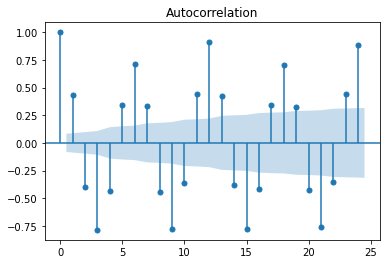

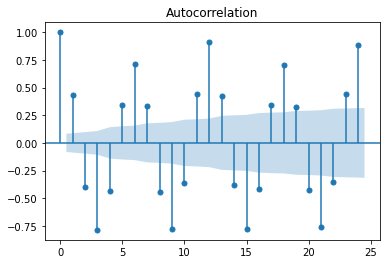

In [70]:
smt.graphics.plot_acf(yt,lags=24)

<i>q=1 because after 1 lag the data is data is dropping

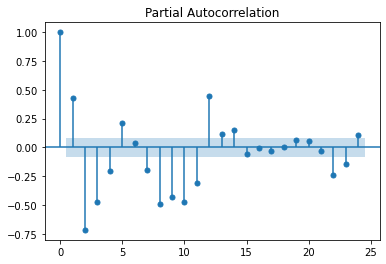

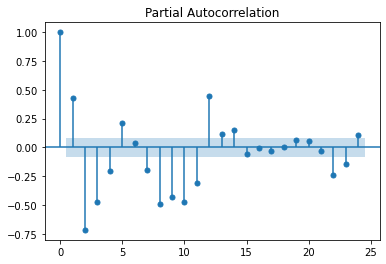

In [68]:
smt.graphics.plot_pacf(yt,lags=24)

<i>p=1 because after 1 lag the data is data is dropping

In [71]:
# Possible Values
# (p,d,q)=(1,1,1)
# (P,D,Q,T)=(1,0,1,12)

In [74]:
p = [0,1,2]; q = [0,1,2];  d=[1]; P = [0,1,2];  Q = [0,1,2]; D= [0,1]
list(itertools.product(p, d, q))

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2)]

In [75]:
[(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12)]

In [77]:
def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 1), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [79]:
best_results = auto_arima(log_Elec_Cons)

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3225.9689567972073
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2460.3880425650086
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-2029.9478344670015
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-2040.7168222627708
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2459.5525874806476
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1711.364834482791
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-2344.897525871565
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-2372.3419293785346
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-1313.6045375680296
SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-1723.5593329735334
SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-2460.57648293653
SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-2634.145149995309
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-1556.6009734573117
SARIMAX(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-1841.4010484621726
SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-2458.6680678926623
SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-2633.6143878432026
Best SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 model - AIC:-2634.145149995

In [89]:
model = sm.tsa.statespace.SARIMAX(train, order = (1,0,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

In [90]:
Forecast_SARIMAX_Train=np.exp(model.forecast(steps=165))

In [97]:
pd.concat([pd.Series(np.exp(test)),pd.Series(Forecast_SARIMAX_Train)],axis=1)
# Forecast_SARIMAX_Train

,Electricty_Consumption_in_TW,predicted_mean
2006-01-01,1.023155,1.055468
2006-02-01,0.929526,0.932140
2006-03-01,0.984756,0.955061
2006-04-01,0.924818,0.946334
2006-05-01,1.049104,1.053668
...,...,...
2019-05-01,1.094169,1.058445
2019-06-01,1.136003,1.127344
2019-07-01,1.101422,1.104527
2019-08-01,0.997339,1.007247


<center><h3>Below is the prediction for the next 1 year.

In [96]:
np.exp(model.predict(start='2020-01-01',end='2020-12-01'))

2020-01-01    1.063227
2020-02-01    0.928470
2020-03-01    0.952599
2020-04-01    0.942778
2020-05-01    1.058787
2020-06-01    1.128114
2020-07-01    1.105153
2020-08-01    1.007289
2020-09-01    0.900335
2020-10-01    0.891563
2020-11-01    0.979857
2020-12-01    1.105199
Freq: MS, Name: predicted_mean, dtype: float64

<b><u>Notes:

SARIMA is chosen over ARIMA because there is seasonality present in the data. <br>
Also when trying to fit ARIMA model, the output wasn't as expected thus, SARIMAX chosen over ARIMAX